In [1]:
#Uploading data to colab
from google.colab import files
files.upload()

Saving name2lang.txt to name2lang.txt


{'name2lang.txt': b"Abreu, Portuguese\r\nAlbuquerque, Portuguese\r\nAlmeida, Portuguese\r\nAlves, Portuguese\r\nAraujo, Portuguese\r\nAraullo, Portuguese\r\nBarros, Portuguese\r\nBasurto, Portuguese\r\nBelo, Portuguese\r\nCabral, Portuguese\r\nCampos, Portuguese\r\nCardozo, Portuguese\r\nCastro, Portuguese\r\nCoelho, Portuguese\r\nCosta, Portuguese\r\nCrespo, Portuguese\r\nCruz, Portuguese\r\nD'cruz, Portuguese\r\nD'cruze, Portuguese\r\nDelgado, Portuguese\r\nDe santigo, Portuguese\r\nDuarte, Portuguese\r\nEsteves, Portuguese\r\nFernandes, Portuguese\r\nFerreira, Portuguese\r\nFerreiro, Portuguese\r\nFerro, Portuguese\r\nFonseca, Portuguese\r\nFranco, Portuguese\r\nFreitas, Portuguese\r\nGarcia, Portuguese\r\nGaspar, Portuguese\r\nGomes, Portuguese\r\nGouveia, Portuguese\r\nGuerra, Portuguese\r\nHenriques, Portuguese\r\nLobo, Portuguese\r\nMachado, Portuguese\r\nMadeira, Portuguese\r\nMagalhaes, Portuguese\r\nMaria, Portuguese\r\nMata, Portuguese\r\nMateus, Portuguese\r\nMatos, Portugu

In [2]:
#Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,GRU,RNN,Dense,Embedding

Using TensorFlow backend.


Reading Input file data

In [0]:
f=open('name2lang.txt','r')
text=f.read().split('\n')

In [0]:
ltrs="abcdefghijklmnopqrstuvwxyz"
ltrs=list(ltrs)
ltrs.append('##pad##')

In [0]:
names=[]
lbl=[]
freq={}
for i in text:
    i=i.split(',')
    name=''
    t=i[0].lower()
    for l in t:
      if l in ltrs:
        name+=l 
    names.append(name)
    lbl.append(i[1].strip())
    if lbl[-1] not in freq.keys():
      freq[lbl[-1]]=1
    else:
      freq[lbl[-1]]+=1  

Visualising distribution of Target & Length of Input

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text major ticklabel objects>)

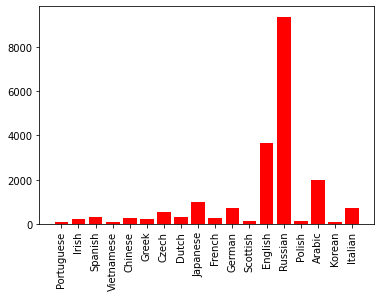

In [5]:
plt.bar(list(freq.keys()),list(freq.values()),color='r')
plt.xticks(rotation=90)

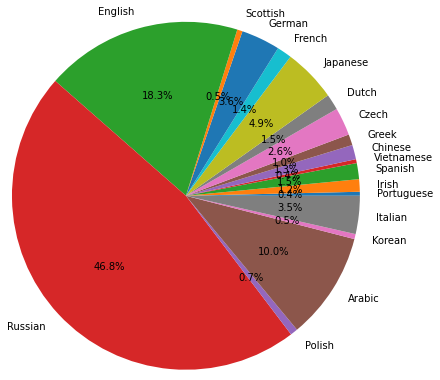

In [6]:
plt.pie(freq.values(),labels=freq.keys(),radius=2,autopct='%1.1f%%')
plt.show()

In [7]:
lengths=[len(name) for name in names]

print('Average number of letters: ',np.mean(lengths))
print('Median no. of ltrs: ',np.median(lengths))
print('standard dev: ',np.std(lengths))

Average number of letters:  7.133665835411471
Median no. of ltrs:  7.0
standard dev:  2.0706207047158274


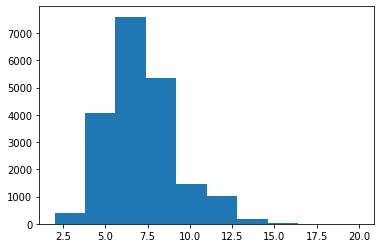

In [8]:
plt.hist(lengths,range=(2,20))
plt.show()

In [0]:
max_len=9
output_len=18

Processing name input into vector

In [10]:
len(ltrs)

27

In [11]:
le=LabelEncoder()
int_enc=le.fit_transform(ltrs)
ohe=OneHotEncoder(sparse=False)
ohe.fit(int_enc.reshape(-1,1))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [0]:
x=[]
for name in names:
    rep_num=le.transform(list(name))
    x.append(rep_num)
        
x=pad_sequences(x,max_len,dtype='int64',padding='post',truncating='post',value=0)

Processing target variable into one-hot encoded form

In [0]:
nat=LabelEncoder()
nat_ie=nat.fit_transform(lbl)
ohe_nat=OneHotEncoder(sparse=False)
y=ohe_nat.fit_transform(nat_ie.reshape(-1,1))

Splitting data into train & test

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,stratify=y)

In [15]:
x_train.shape

(16040, 9)

Defining LSTM model

In [0]:
hidden_size=256
model=Sequential([Embedding(input_dim=len(ltrs), output_dim=hidden_size,mask_zero=True),
                  LSTM(hidden_size,return_sequences=True),
                  LSTM(50,return_sequences=False),
                  Dense(18,activation='softmax')
    ])

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 256)         6912      
_________________________________________________________________
lstm (LSTM)                  (None, None, 256)         525312    
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                61400     
_________________________________________________________________
dense (Dense)                (None, 18)                918       
Total params: 594,542
Trainable params: 594,542
Non-trainable params: 0
_________________________________________________________________


Training model

In [20]:
model.fit(x_train,y_train,epochs=50,batch_size=512,validation_split=0.2)

Epoch 1/50
26/26 [==============================] - 3s 125ms/step - loss: 2.1952 - accuracy: 0.4545 - val_loss: 1.7953 - val_accuracy: 0.4629
Epoch 2/50
26/26 [==============================] - 1s 23ms/step - loss: 1.6890 - accuracy: 0.5034 - val_loss: 1.6356 - val_accuracy: 0.5203
Epoch 3/50
26/26 [==============================] - 1s 24ms/step - loss: 1.5433 - accuracy: 0.5689 - val_loss: 1.4916 - val_accuracy: 0.5823
Epoch 4/50
26/26 [==============================] - 1s 24ms/step - loss: 1.4115 - accuracy: 0.6058 - val_loss: 1.3947 - val_accuracy: 0.6116
Epoch 5/50
26/26 [==============================] - 1s 23ms/step - loss: 1.3165 - accuracy: 0.6262 - val_loss: 1.3386 - val_accuracy: 0.6147
Epoch 6/50
26/26 [==============================] - 1s 23ms/step - loss: 1.2965 - accuracy: 0.6393 - val_loss: 1.2794 - val_accuracy: 0.6262
Epoch 7/50
26/26 [==============================] - 1s 23ms/step - loss: 1.2398 - accuracy: 0.6471 - val_loss: 1.2452 - val_accuracy: 0.6368
Epoch 8/50
2

In [21]:
model.evaluate(x_test,y_test)

126/126 [==============================] - 1s 6ms/step - loss: 0.6686 - accuracy: 0.8105


[0.6685804128646851, 0.8104737997055054]

Saving model weights

In [0]:
model.save_weights('model_weights.h5')

In [0]:
model.load_weights('model_weights.h5')

Evaluation

In [0]:
def process_ip(str):
  str=str.lower()
  ip=list(str)
  ip=le.transform(ip)

  pad_ip=[]
  for i in range(max_len):
    if i<len(ip):
      pad_ip.append(ip[i])
    else:
      pad_ip.append(0)

  pad_ip=np.asarray(pad_ip)
  pad_ip=np.expand_dims(pad_ip,axis=0)
  return pad_ip

def evaluate(str):
  model_ip=process_ip(str)
  model_op=model.predict(model_ip)
  ans=np.asarray([np.argmax(model_op)])
  ans=nat.inverse_transform(ans)
  ans=ans[0]

  return ans



In [36]:

test_name=input()

print()
ans=evaluate(test_name)
print('Given Name  : ',test_name)
print('Nationality : ',ans)


sherlock

Given Name  :  sherlock
Nationality :  English
